In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
import skimage as ski
from skimage import io


# Building edge for tests

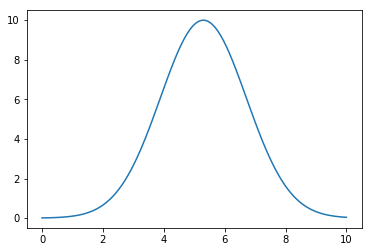

In [65]:
x=np.linspace(0,10,100)
arg=(x-5.3)/2;
A=10
y=A*np.exp(-arg*arg);
plt.plot(x,y)
y[y<1e-3]=0

In [66]:
y.shape

(100,)

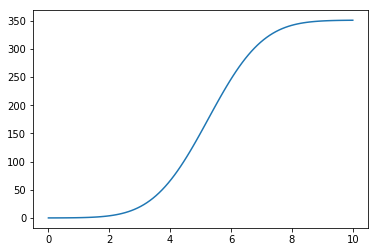

In [67]:
cy=np.cumsum(y)
plt.plot(x,cy)


In [68]:
dcy=np.diff(cy)

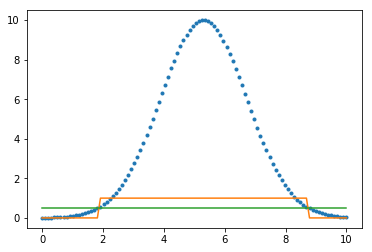

In [69]:
plt.plot(x,y,'.',x,0.5<y,x,np.ones(x.size)*0.5)

In [70]:
(0.5<y).sum()*20/1000

1.3600000000000001

In [71]:
2*np.sqrt(np.log(2))*2

3.3302184446307908

In [72]:
np.log(np.exp(1))

1.0

# Look at unit test results

-2.99131601064
-2.99131601064


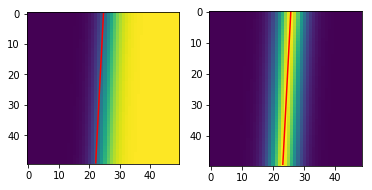

In [136]:
a=io.imread('../../../../../lib/slantededge.tif')
plt.subplot(121)
plt.imshow(a)
m= 24.6932 ; k= -0.0522558
print(np.arctan(k)*180/np.pi)
ybx=np.arange(0,a.shape[0])
xbx=m+k*ybx
plt.plot(xbx,ybx,'r')

plt.subplot(122)
plt.imshow(np.diff(a,axis=1))
m= 25.6932 ; k= -0.0522558
print(np.arctan(k)*180/np.pi)
ybx=np.arange(0,a.shape[0])
xbx=m+k*ybx
plt.plot(xbx,ybx,'r')



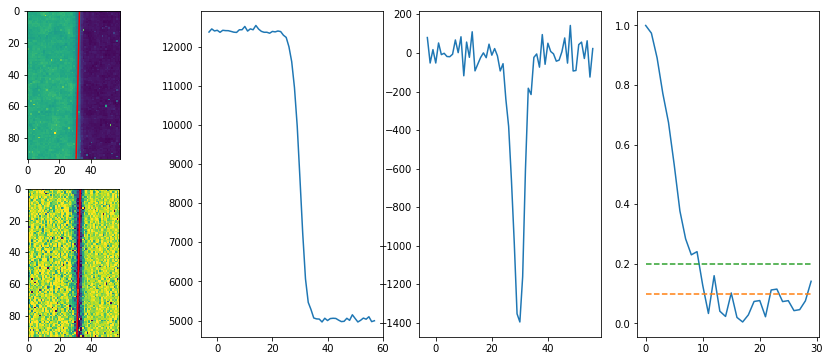

In [145]:
b=io.imread('../../UnitTests/data/raw_edge.tif').astype(float)
plt.figure(figsize=[15,6])
plt.subplot(241)
plt.imshow(b)
m= 32.8755 ;k= -0.0226082
yax=np.arange(0,b.shape[0])
xax=m+k*yax
plt.plot(xax,yax,'r')

plt.subplot(245)
plt.imshow(np.diff(b,axis=1),clim=[-1600,200])
plt.plot(xax,yax,'r')


plt.subplot(1,4,2)
d = np.loadtxt('../../../../../lib/profile.txt', delimiter="\t")
plt.plot(d[:,0],(d[:,1]))

plt.subplot(1,4,3)
dd=np.diff(d[:,1])
plt.plot(d[0:-1,0],dd)

plt.subplot(1,4,4)
ftdd=np.abs(np.fft.fft(dd))
plt.plot(ftdd[0:len(ftdd)//2]/ftdd[0])
plt.plot([0,len(ftdd)//2-1],[0.1,0.1],'--')
plt.plot([0,len(ftdd)//2-1],[0.2,0.2],'--')



In [112]:
len(ftdd)

60

# Weighted CoG

3.58072647264 3.58634530613
5.26224022147 5.24608658001 5.29239298301


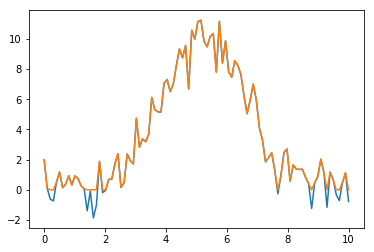

In [74]:
y2=y+np.random.normal(0,0.1*A,size=y.size)
c1=(x*y2).sum()/y2.sum()
plt.plot(x,y2)
y3=y2
y3[y2<0]=0
plt.plot(x,y3)

c2=(x*y3).sum()/y3.sum()
print(y2.mean(), y2.std())

y4=y2;
y4=y4-(y4.mean()+y4.std())
y4[y4<0]=0
c3=(x*y4).sum()/y4.sum()
print(c1,c2,c3)




In [78]:
c1=[]
c2=[]
c3=[]
for i in np.arange(0,100) :
    y2=y+np.random.normal(0,0.1*A,size=y.size)
    c1.append((x*y2).sum()/y2.sum())
    
    y3=y2
    y3[y2<0]=0
    c2.append((x*y3).sum()/y3.sum())
    y4=y2;
    y4=y4-(y4.mean()+y4.std())
    y4[y4<0]=0
    c3.append((x*y4).sum()/y4.sum())


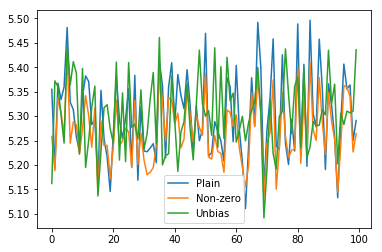

In [79]:
plt.plot(c1,label='Plain')
plt.plot(c2,label='Non-zero')
plt.plot(c3,label='Unbias')
plt.legend()

In [80]:
print(np.mean(c1),np.mean(c2),np.mean(c3))

5.30135858415 5.26945769642 5.30242474442
